In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
data = pd.read_csv('BUD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,126.730003,127.959999,126.720001,127.470001,109.314354,854400
1,7/23/2015,127.129997,127.139999,125.519997,125.800003,107.882210,1412600
2,7/24/2015,125.870003,126.040001,124.269997,124.389999,106.673027,1116100
3,7/27/2015,123.690002,123.919998,122.800003,123.339996,105.772583,1400700
4,7/28/2015,123.529999,124.230003,122.900002,123.800003,106.167076,983400


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,127.470001
1,7/23/2015,125.800003
2,7/24/2015,124.389999
3,7/27/2015,123.339996
4,7/28/2015,123.800003


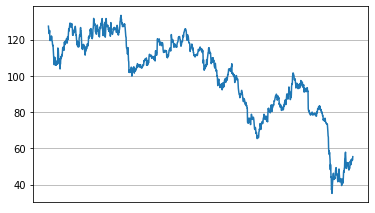

In [4]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()

fig, ax = plt.subplots()
ax.plot('Date', "Close", data=data)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()

plt.show()

Text(0.5, 1.0, 'BUD (Anheuser-Busch) Stock History')

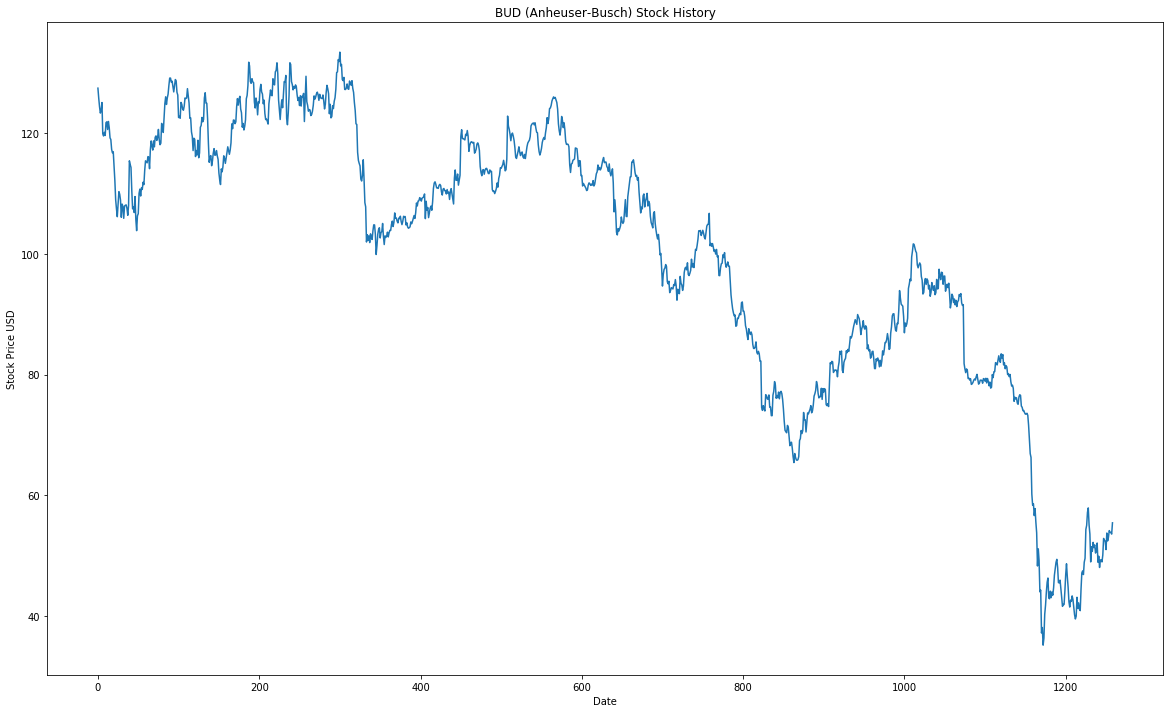

In [5]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(20,12))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('BUD (Anheuser-Busch) Stock History')

In [6]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,127.470001
1,2015-07-23,125.800003
2,2015-07-24,124.389999
3,2015-07-27,123.339996
4,2015-07-28,123.800003


In [7]:
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_df)):
    input_data.append(model_df.loc[i-60:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [8]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
# Reshape training data
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [10]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 419 samples
Epoch 1/10
419/419 - 4s - loss: 0.1457
Epoch 2/10
419/419 - 0s - loss: 0.0315
Epoch 3/10
419/419 - 0s - loss: 0.0179
Epoch 4/10
419/419 - 0s - loss: 0.0132
Epoch 5/10
419/419 - 0s - loss: 0.0120
Epoch 6/10
419/419 - 0s - loss: 0.0099
Epoch 7/10
419/419 - 0s - loss: 0.0091
Epoch 8/10
419/419 - 0s - loss: 0.0084
Epoch 9/10
419/419 - 0s - loss: 0.0076
Epoch 10/10
419/419 - 0s - loss: 0.0074


In [11]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [12]:
# Evaluate the data model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

140/1 - 1s - loss: 0.0073
Loss: 0.00867920434102416


In [13]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[118.99294 ],
       [124.96874 ],
       [116.53372 ],
       [124.68809 ],
       [118.24659 ],
       [119.71452 ],
       [126.31187 ],
       [126.88934 ],
       [110.997856],
       [118.805   ],
       [124.470085],
       [125.7616  ],
       [119.636154],
       [117.54451 ],
       [124.56445 ],
       [125.57839 ],
       [112.72143 ],
       [125.361015],
       [113.64543 ],
       [125.57822 ],
       [111.537   ],
       [111.37733 ],
       [109.15685 ],
       [116.820595],
       [111.57413 ],
       [117.72121 ],
       [120.15957 ],
       [111.497795],
       [124.45926 ],
       [110.94274 ],
       [117.2676  ],
       [124.79495 ],
       [126.54286 ],
       [111.2316  ],
       [109.565315],
       [124.50286 ],
       [123.48656 ],
       [115.04043 ],
       [115.25113 ],
       [107.98509 ],
       [123.37122 ],
       [125.76495 ],
       [112.90681 ],
       [124.97065 ],
       [124.61402 ],
       [118.7484  ],
       [124.03827 ],
       [125.0

In [14]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [15]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,118.992943
1,124.968742
2,116.533722
3,124.688087
4,118.246590
...,...
135,125.156998
136,104.732101
137,125.030952
138,123.121429


In [16]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[121.629997],
       [122.260002],
       [113.980003],
       [123.809998],
       [118.019997],
       [114.769997],
       [127.75    ],
       [125.080002],
       [108.279999],
       [118.82    ],
       [130.059998],
       [130.410004],
       [122.389999],
       [115.529999],
       [124.559998],
       [125.010002],
       [119.470001],
       [124.889999],
       [110.5     ],
       [128.449997],
       [110.669998],
       [111.330002],
       [107.610001],
       [115.75    ],
       [109.940002],
       [119.790001],
       [116.410004],
       [112.230003],
       [126.129997],
       [111.370003],
       [119.620003],
       [123.93    ],
       [128.389999],
       [110.82    ],
       [109.940002],
       [128.259995],
       [131.770004],
       [113.82    ],
       [114.18    ],
       [109.330002],
       [129.139999],
       [129.039993],
       [103.18    ],
       [124.      ],
       [123.849998],
       [116.739998],
       [115.489998],
       [131.6

In [17]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,118.992943,121.629997
1,124.968742,122.260002
2,116.533722,113.980003
3,124.688087,123.809998
4,118.246590,118.019997
...,...,...
135,125.156998,127.370003
136,104.732101,103.000000
137,125.030952,125.739998
138,123.121429,121.010002


In [18]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [19]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [20]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[112.445114],
       [112.65887 ],
       [112.89441 ],
       [113.13808 ],
       [113.37425 ],
       [113.59505 ],
       [113.82583 ],
       [114.07159 ],
       [114.34309 ],
       [114.58274 ],
       [114.80236 ],
       [114.9848  ],
       [115.118454],
       [115.19346 ],
       [115.207825],
       [115.21755 ],
       [115.174484],
       [115.07983 ],
       [114.96216 ],
       [114.860054],
       [114.69191 ],
       [114.3112  ],
       [113.857956],
       [113.291176],
       [112.56109 ],
       [111.71245 ],
       [110.857735],
       [110.010254],
       [109.22181 ],
       [108.54951 ],
       [108.00896 ],
       [107.586075],
       [107.24332 ],
       [106.9955  ],
       [106.87431 ],
       [106.91845 ],
       [106.99104 ],
       [107.07697 ],
       [107.26136 ],
       [107.56463 ],
       [107.97661 ],
       [108.50277 ],
       [109.085464],
       [109.75948 ],
       [110.492645],
       [111.2473  ],
       [111.95197 ],
       [112.5

In [21]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [22]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,113.599998
620,2018-01-05,114.739998
621,2018-01-08,113.949997
622,2018-01-09,114.330002
623,2018-01-10,113.919998
...,...,...
1254,2020-07-15,54.160000
1255,2020-07-16,53.910000
1256,2020-07-17,53.849998
1257,2020-07-20,53.580002


In [23]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,113.599998,112.445114
620,2018-01-05,114.739998,112.658867
621,2018-01-08,113.949997,112.894409
622,2018-01-09,114.330002,113.138077
623,2018-01-10,113.919998,113.374252
...,...,...,...
1254,2020-07-15,54.160000,69.740547
1255,2020-07-16,53.910000,69.858482
1256,2020-07-17,53.849998,69.978516
1257,2020-07-20,53.580002,70.088951


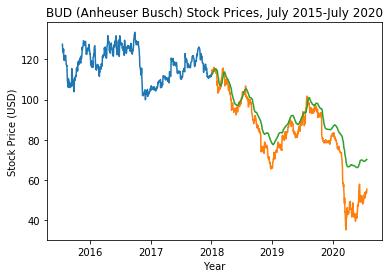

In [24]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("BUD (Anheuser Busch) Stock Prices, July 2015-July 2020")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.savefig('BUD_Prediction.png')